In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("titanic-data-6.csv")

In [4]:
#Limpando os dados

# Prenchendo valores faltantes com a média, neste caso das idades
am = df['Age'].mean()
df['Age'].fillna(am,inplace=True)

#Ajustando cabines que estão nulas para N/I
df['Cabin'].fillna('N/I',inplace=True)

#Assumimos que embarques que não estejam marcados, aconteceram em Southampton
df['Embarked'].fillna('S',inplace=True)

In [5]:
"""
    Função que calcula Média

    INPUT:
    df: dataframe que será utilizada
    column: str. Nome da coluna que será realizada query
    result_col: str. Nome da coluna a qual a média será calculada
    parameter: str. Parâmetro que será utilizado na condição da query

    OUTPUT:
    Imprimi a média da coluna solicitada de acordo com o parametro informado
"""
def calcula_media(df, column, result_col, parameter):
    return round(df.query("{} == {}".format(column,parameter))[result_col].mean(),2)


idade_media_sobreviventes = calcula_media(df,"Survived","Age",1)
idade_media_nao_sobreviventes = calcula_media(df,"Survived","Age",0)

In [6]:
total_passageiros = df["PassengerId"].count()
sobreviventes = df.query("Survived == '1'")["PassengerId"].count()
nao_sobreviventes = df.query("Survived == '0'")["PassengerId"].count()


print("Para o estudo possuímos dados de {} passageiros".format(total_passageiros))
print("Destes {} sobreviveram e {} não sobreviveram o acidente".format(sobreviventes,nao_sobreviventes))

Para o estudo possuímos dados de 891 passageiros
Destes 342 sobreviveram e 549 não sobreviveram o acidente


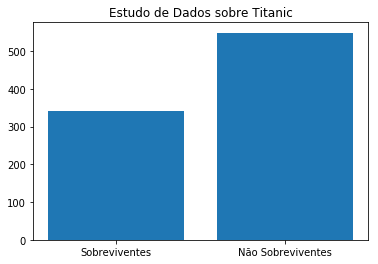

A idade média dos sobreviventes é de 28.55
A idade média dos não sobreviventes é de 30.42


In [7]:
#Gráfico de barras
locations = [1, 2]
heights = [sobreviventes, nao_sobreviventes]
labels = ['Sobreviventes', 'Não Sobreviventes']
plt.bar(locations, heights, tick_label=labels)
plt.title('Estudo de Dados sobre Titanic')
plt.show(block=True)

print("A idade média dos sobreviventes é de {}".format(idade_media_sobreviventes))
print("A idade média dos não sobreviventes é de {}".format(idade_media_nao_sobreviventes))

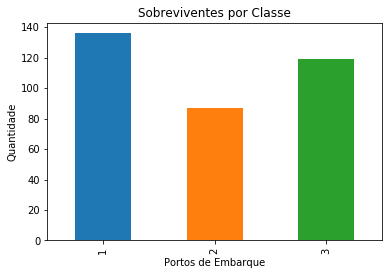

In [30]:
df_survivals = df.query("Survived == 1")


ax = df_survivals.groupby(['Pclass'])['Pclass'].count().plot(kind="bar", title="Sobreviventes por Classe");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            342 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Cabin          342 non-null object
Embarked       342 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB
None


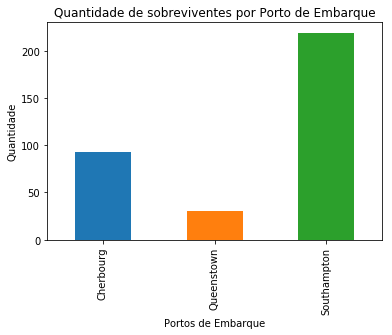

In [38]:

    
ax = df_survivals.replace('C','Cherbourg').replace('Q','Queenstown').replace('S','Southampton').groupby(['Embarked'])['Embarked'].count().plot(kind="bar",title="Quantidade de sobreviventes por Porto de Embarque");
ax.set(xlabel="Portos de Embarque", ylabel="Quantidade");